<a href="https://colab.research.google.com/github/cath19/DSPS_cHarty/blob/master/HW5/BuildingsEnergyOwners_cHarty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Catherine Harty

PHYS467

HW5

In [1]:
# -- link google drive
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# -- useful imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scipy as sp
from scipy import stats

# data retrival
### LL84
get the Local Law 84 (ll84) data from the URL: https://data.cityofnewyork.us/api/views/8u86-bviy/rows.csv and read it in with Pandas

### Pluto
Download the pluto csv data and store it in your google drive. 

You can find the data here 
https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page

IMPORTANT: store it in the path *drive/My Drive/dsps/ with the name pluto_18v2_1.csv*

This path and name have to be exact. This way the grader and I will be able to run your notebook without changing anything as long as we also have stored the data in path drive/My Drive/dsps/pluto_18v2_1.csv. This is part of the _reproducibility_ requirement.

In [0]:
ll84 = pd.read_csv("https://data.cityofnewyork.us/api/views/8u86-bviy/rows.csv")

In [4]:
ls

drive/  sample_data/


In [5]:
mkdir 'drive/My Drive/dsps' #making the folder dsps

mkdir: cannot create directory ‘drive/My Drive/dsps’: File exists


In [39]:
!wget 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v2_1_csv.zip'

--2019-09-29 22:46:07--  https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v2_1_csv.zip
Resolving www1.nyc.gov (www1.nyc.gov)... 184.27.76.31, 2600:1402:3800:29d::1500, 2600:1402:3800:290::1500
Connecting to www1.nyc.gov (www1.nyc.gov)|184.27.76.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82994022 (79M) [application/zip]
Saving to: ‘nyc_pluto_18v2_1_csv.zip’

nyc_pluto_18v2_1_cs 100%[===================>]  79.15M  8.37MB/s    in 9.2s    

2019-09-29 22:46:16 (8.64 MB/s) - ‘nyc_pluto_18v2_1_csv.zip’ saved [82994022/82994022]



In [5]:
cd drive/My Drive/dsps

/content/drive/My Drive/dsps


In [6]:
!unzip nyc_pluto_18v2_1_csv.zip

Archive:  nyc_pluto_18v2_1_csv.zip
replace pluto_18v2_1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace PLUTODD18v2.1.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace PlutoReadme18v2.1.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: o
error:  invalid response [o]
replace PlutoReadme18v2.1.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [44]:
ls

columns.txt               pluto_18v2_1.csv   PlutoReadme18v2.1.pdf
nyc_pluto_18v2_1_csv.zip  PLUTODD18v2.1.pdf  PlutoReadme19v1.pdf
nyc_pluto_19v1_csv.zip    PLUTODD19v1.pdf


# data fusion

### select data
select the data for buildings _in the borough of Manhattan_ only from the pluto file (you can do it broadcasting!)

### merge
merge the pluto and ll84 dataframes. you will have to choose an appropriate column that both datasets share fo do so. The column may not have the same nbame, but should have the same _variable_.

In [7]:
#Select data and merge
pluto = pd.read_csv('pluto_18v2_1.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,17,18,20,22,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
pluto.describe()

,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,policeprct,healtharea,sanitboro,spdist3,landuse,easements,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,proxcode,lottype,bsmtcode,assessland,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,appbbl,mappluto_f,plutomapid,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,masdate,polidate
count,858976.000000,858976.000000,857982.000000,857982.000000,857982.000000,857344.000000,857982.000000,838441.000000,857345.000000,857346.000000,857171.000000,0.0,856083.000000,858507.000000,8.583560e+05,8.585290e+05,8.096940e+05,8.096940e+05,8.096940e+05,8.096940e+05,8.096940e+05,8.096940e+05,8.096940e+05,8.096940e+05,858976.000000,858356.000000,858356.000000,858507.000000,858507.000000,858356.000000,856545.000000,858356.000000,858356.000000,858507.000000,858507.000000,858507.000000,8.585070e+05,8.585070e+05,8.585070e+05,8.585070e+05,858507.000000,858507.000000,858507.000000,854977.000000,858507.000000,858507.000000,858507.000000,858976.000000,8.589760e+05,858356.000000,857982.000000,8.578120e+05,857812.000000,8.583560e+05,0.0,858826.000000,857171.000000,857346.000000,34683.0,65688.0,0.0,0.0
mean,5307.338576,135.270791,354.514803,462.273701,2054.777899,22.041584,32.101221,11015.213669,87.000275,3262.760204,3.464276,NaN,2.149761,0.005242,7.937897e+03,6.411299e+03,2.248325e+03,4.294934e+03,8.082192e+02,3.419765e+02,1.493687e+02,1.238211e+02,1.440209e+02,6.474061e+02,2.255082,1.291055,2.315579,4.160894,4.587796,39.977163,104.042159,25.689628,46.103376,1.530271,4.714052,2.103957,1.139497e+05,4.585309e+05,5.190725e+04,1.684604e+05,1841.287844,210.343161,35.738762,1.226374,1.368993,0.202727,2.225253,3.463667,3.516741e+09,15.352372,9325.942479,1.005945e+06,191313.541374,3.992014e+08,NaN,1.003281,8.075643,38.289100,1.0,1.0,NaN,NaN
std,3697.499152,753.641308,100.938490,377.449699,1158.419089,7.987327,13.251594,469.390647,29.386616,2663.452517,1.022510,NaN,2.378056,0.083155,3.726748e+05,6.022283e+04,5.166377e+04,3.179758e+04,2.198613e+04,6.046725e+03,5.790062e+03,4.894631e+03,4.448854e+03,4.184395e+04,1.104507,2.853721,1.950388,34.633527,42.309523,75.383917,68.700598,33.659424,35.954682,1.026244,0.839128,1.373963,5.793031e+06,1.116336e+07,5.712316e+06,1.019491e+07,429.591572,613.459661,265.360921,77.147372,1.374491,1.084869,1.678475,1.023594,1.031690e+09,195.213259,26335.927917,3.271342e+04,30764.953516,1.222593e+09,NaN,0.076718,4.930125,9.628165,0.0,0.0,NaN,NaN
min,0.000000,0.000000,101.000000,1.000000,1.000000,1.000000,1.000000,10001.000000,1.000000,100.000000,1.000000,NaN,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000010e+09,0.000000,1.000000,9.131640e+05,120146.000000,0.000000e+00,NaN,1.000000,1.000000,11.000000,1.0,1.0,NaN,NaN
25%,2310.000000,19.000000,306.000000,170.000000,1004.000000,17.000000,22.000000,10466.000000,66.000000,920.000000,3.000000,NaN,1.000000,0.000000,2.000000e+03,1.376000e+03,0.000000e+00,1.258000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,1.000000,2.000000,1.000000,1.000000,20.000000,97.420000,18.000000,34.000000,1.000000,5.000000,1.000000,6.848000e+03,2.370950e+04,0.000000e+00,0.000000e+00,1920.000000,0.000000,0.000000,0.470000,0.600000,0.000000,1.000000,3.000000,3.031620e+09,0.000000,211.000000,9.892730e+05,167929.000000,0.000000e+00,NaN,1.000000,3.000000,33.000000,1.0,1.0,NaN,NaN
50%,4810.000000,39.000000,402.000000,350.000000,2001.000000,24.000000,32.000

In [0]:
plutoMN = pluto[pluto['borough'] == 'MN']

In [10]:
ll84.describe()

,Order,Property Id,BBL - 10 digits,Street Number,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.169500e+04,9560.000000,1.162800e+04,1.174400e+04,11746.000000,11746.000000,11746.000000,11583.000000,1.150200e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,2.178124e+09,1007.087343,1.732695e+05,1.605524e+05,1948.738379,1.289971,98.762557,280.071484,5.965472e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,1.222326e+09,1577.529413,3.367055e+05,3.095746e+05,30.576386,4.017484,7.501603,8607.178877,3.154430e+07,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,1.000048e+09,1.000000,5.002800e+04,5.400000e+01,1600.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,1.012930e+09,150.000000,6.524000e+04,6.520100e+04,1927.000000,1.000000,100.000000,61.800000,1.043673e+06,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,2.028770e+09,446.000000,9.313850e+04,9.132400e+04,1941.000000,1.000000,100.000000,78.500000,1.855196e+06,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,3.064149e+09,1304.500000,1.596140e+05,1.532550e+05,1966.000000,1.000000,100.000000,97.600000,4.370302e+06,9.084250e+02,4.475000e+02,4.249000e+02,1.584140e+05,162.750000,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,5.079910e+09,76179.000000,1.354011e+07,1.421712e+07,2019.000000,161.000000,100.000000,869265.000000,1.691763e+09,2.094340e+07,2.094340e+07,4.764375e+06,1.421712e+07,912801.100000,40.912869,-73.715543,56.000000,51.000000,155101.000000


In [0]:
mergeData = pd.merge(plutoMN, ll84, left_on = "bbl", right_on = "BBL - 10 digits")

In [12]:
mergeData.describe()

,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,policeprct,healtharea,sanitboro,spdist3,landuse,easements,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,proxcode,lottype,bsmtcode,assessland,assesstot,exemptland,exempttot,...,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,appbbl,mappluto_f,plutomapid,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,masdate,polidate,Order,Property Id,BBL - 10 digits,Street Number,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,5196.000000,5196.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,0.0,5195.000000,5195.000000,5.195000e+03,5.195000e+03,5.076000e+03,5.076000e+03,5.076000e+03,5.076000e+03,5076.000000,5.076000e+03,5076.000000,5.076000e+03,5196.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5096.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5.195000e+03,5.195000e+03,5.195000e+03,5.195000e+03,...,5194.000000,5195.000000,5195.000000,5195.000000,5196.0,5.196000e+03,5195.000000,5194.000000,5.186000e+03,5186.000000,5.195000e+03,0.0,5196.000000,5194.000000,5194.000000,226.0,280.0,0.0,0.0,5196.000000,5.196000e+03,5.196000e+03,5145.000000,5.159000e+03,5.196000e+03,5196.000000,5196.000000,5196.000000,5133.000000,5.109000e+03,5.180000e+03,5176.000000,5.178000e+03,5.196000e+03,5133.000000,5123.000000,5123.000000,5123.000000,5123.000000,5123.000000
mean,1209.808507,1599.197844,106.610512,130.447391,2496.161725,2.683673,4.578552,10029.246631,17.893531,4380.847131,1.002503,NaN,4.155534,0.013474,2.629642e+04,2.102929e+05,1.063839e+05,9.894087e+04,7.432383e+04,1.003428e+04,4397.347518,3.109901e+03,583.496848,1.101913e+04,2.007313,1.346487,15.515014,89.770934,103.174976,132.230281,148.831884,109.813973,116.644970,1.605005,3.523965,2.348027,5.238964e+06,2.858658e+07,9.610450e+05,5.951660e+06,...,10.644399,6.861956,4.329163,8.615700,1.0,1.012100e+09,254.097016,1887.435310,9.915341e+05,219658.820285,2.715366e+08,NaN,1.002694,6.348864,14.532345,1.0,1.0,NaN,NaN,3308.602002,3.504990e+06,1.012100e+09,524.704956,2.158109e+05,1.960941e+05,1943.851424,1.056967,98.530600,252.671693,8.586619e+06,4.690378e+03,467.159602,4.225549e+03,2.082749e+05,364.997467,40.769445,-73.973739,6.343354,4.570564,1888.975405
std,556.820330,3036.155372,5.905134,70.234143,1718.438083,1.338614,2.459236,37.815934,9.384301,2007.014474,0.049971,NaN,1.333951,0.129464,7.439480e+04,3.169049e+05,2.806921e+05,1.839216e+05,2.384847e+05,4.711859e+04,18891.793865,3.342596e+04,16850.792197,9.835008e+04,0.198028,2.103425,10.218468,189.232392,191.115208,109.483214,102.597354,133.167566,149.498188,1.221476,1.475363,1.478036,1.176088e+07,5.481309e+07,6.338876e+06,2.869739e+07,...,5.836134,3.419174,5.294484,3.170015,0.0,5.567705e+06,610.624846,5144.634979,5.939146e+03,13416.304401,4.479919e+08,NaN,0.055431,2.912084,1.489876,0.0,0.0,NaN,NaN,1746.079833,1.060420e+06,5.567705e+06,1266.223623,3.234412e+05,2.894683e+05,33.097276,0.776103,8.235071,3121.410155,2.492531e+07,8.895574e+04,2178.380713,8.896156e+04,3.097123e+05,3798.585372,0.036772,0.021392,2.905281,2.455748,5154.750452
min,4.000000,1.000000,101.000000,2.020000,1000.000000,1.000000,1.000000,10001.000000,1.000000,110.000000,1.000000,NaN,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

# data exploration and cleaning

### extact columns
extract the columns listed in the file "columns.txt" from the dataset.

convert the resulting dataset to numerical, converting non-numerical values to NaN. drop rows that contain invalid values and save the resulting dataframe (_reducted_ dataframe)

In [0]:
columns = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS/master/HW5/columns.txt', header = None)

In [14]:
columns

,0
0,DOF Gross Floor Area
1,Year Built
2,Number of Buildings - Self-reported
3,Occupancy
4,ENERGY STAR Score
5,Site EUI (kBtu/ft²)
6,Weather Normalized Site EUI (kBtu/ft²)
7,Weather Normalized Site Electricity Intensity ...
8,Weather Normalized Site Natural Gas Intensity ...
9,Weather Normalized Source EUI (kBtu/ft²)


In [15]:
mergeData.describe()

,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,policeprct,healtharea,sanitboro,spdist3,landuse,easements,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,proxcode,lottype,bsmtcode,assessland,assesstot,exemptland,exempttot,...,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,appbbl,mappluto_f,plutomapid,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,masdate,polidate,Order,Property Id,BBL - 10 digits,Street Number,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,5196.000000,5196.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,5194.000000,0.0,5195.000000,5195.000000,5.195000e+03,5.195000e+03,5.076000e+03,5.076000e+03,5.076000e+03,5.076000e+03,5076.000000,5.076000e+03,5076.000000,5.076000e+03,5196.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5096.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5.195000e+03,5.195000e+03,5.195000e+03,5.195000e+03,...,5194.000000,5195.000000,5195.000000,5195.000000,5196.0,5.196000e+03,5195.000000,5194.000000,5.186000e+03,5186.000000,5.195000e+03,0.0,5196.000000,5194.000000,5194.000000,226.0,280.0,0.0,0.0,5196.000000,5.196000e+03,5.196000e+03,5145.000000,5.159000e+03,5.196000e+03,5196.000000,5196.000000,5196.000000,5133.000000,5.109000e+03,5.180000e+03,5176.000000,5.178000e+03,5.196000e+03,5133.000000,5123.000000,5123.000000,5123.000000,5123.000000,5123.000000
mean,1209.808507,1599.197844,106.610512,130.447391,2496.161725,2.683673,4.578552,10029.246631,17.893531,4380.847131,1.002503,NaN,4.155534,0.013474,2.629642e+04,2.102929e+05,1.063839e+05,9.894087e+04,7.432383e+04,1.003428e+04,4397.347518,3.109901e+03,583.496848,1.101913e+04,2.007313,1.346487,15.515014,89.770934,103.174976,132.230281,148.831884,109.813973,116.644970,1.605005,3.523965,2.348027,5.238964e+06,2.858658e+07,9.610450e+05,5.951660e+06,...,10.644399,6.861956,4.329163,8.615700,1.0,1.012100e+09,254.097016,1887.435310,9.915341e+05,219658.820285,2.715366e+08,NaN,1.002694,6.348864,14.532345,1.0,1.0,NaN,NaN,3308.602002,3.504990e+06,1.012100e+09,524.704956,2.158109e+05,1.960941e+05,1943.851424,1.056967,98.530600,252.671693,8.586619e+06,4.690378e+03,467.159602,4.225549e+03,2.082749e+05,364.997467,40.769445,-73.973739,6.343354,4.570564,1888.975405
std,556.820330,3036.155372,5.905134,70.234143,1718.438083,1.338614,2.459236,37.815934,9.384301,2007.014474,0.049971,NaN,1.333951,0.129464,7.439480e+04,3.169049e+05,2.806921e+05,1.839216e+05,2.384847e+05,4.711859e+04,18891.793865,3.342596e+04,16850.792197,9.835008e+04,0.198028,2.103425,10.218468,189.232392,191.115208,109.483214,102.597354,133.167566,149.498188,1.221476,1.475363,1.478036,1.176088e+07,5.481309e+07,6.338876e+06,2.869739e+07,...,5.836134,3.419174,5.294484,3.170015,0.0,5.567705e+06,610.624846,5144.634979,5.939146e+03,13416.304401,4.479919e+08,NaN,0.055431,2.912084,1.489876,0.0,0.0,NaN,NaN,1746.079833,1.060420e+06,5.567705e+06,1266.223623,3.234412e+05,2.894683e+05,33.097276,0.776103,8.235071,3121.410155,2.492531e+07,8.895574e+04,2178.380713,8.896156e+04,3.097123e+05,3798.585372,0.036772,0.021392,2.905281,2.455748,5154.750452
min,4.000000,1.000000,101.000000,2.020000,1000.000000,1.000000,1.000000,10001.000000,1.000000,110.000000,1.000000,NaN,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [0]:
extractedData = pd.DataFrame()
for i in range(0,22):
  extractedData[columns.iloc[i,0]] = mergeData[columns.iloc[i,0]]


In [17]:
extractedData.head()

,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
0,672462.0,1960,1,100,54,119.0,117.7,15.7,0,244.9,39568525.5,6852.7,736974,19175.1,26.02,246.9,672462.0,1.0,33.0,0.0,1.0,2004.0
1,197972.0,1962,1,95,Not Available,49340.7,49620.8,5,Not Available,59728.9,3384274.5,648675.6,197972,Not Available,Not Available,59392.0,197972.0,1.0,16.0,147.0,159.0,2014.0
2,70000.0,1915,1,100,Not Available,60.4,64.2,4.8,0.5,101.5,1191944.3,272.0,70000,1271.7,18.17,99.0,70000.0,1.0,6.0,29.0,30.0,1986.0
3,156508.0,1920,1,100,91,64.5,66.4,10.5,0,143.4,5752573.8,844.2,156446,3008.1,19.23,143.6,156508.0,1.0,12.0,0.0,12.0,0.0
4,114992.0,1929,1,100,92,82.8,85.1,5.8,Not Available,128.1,2474732.2,788.6,120904,5189.4,42.92,127.2,114992.0,2.0,16.0,235.0,237.0,1985.0


In [18]:
extractedData.shape

(5196, 22)

In [19]:
len(extractedData)

5196

In [20]:
file = open("columns.txt" ,'r')
for line in file:
  extractedData = extractedData[extractedData[line.rstrip()] != "Not Available"]

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [21]:
extractedData

,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
0,672462.0,1960,1,100,54,119.0,117.7,15.7,0,244.9,39568525.5,6852.7,736974,19175.1,26.02,246.9,672462.0,1.0,33.0,0.0,1.0,2004.0
3,156508.0,1920,1,100,91,64.5,66.4,10.5,0,143.4,5752573.8,844.2,156446,3008.1,19.23,143.6,156508.0,1.0,12.0,0.0,12.0,0.0
7,2542563.0,1970,1,100,84,104.8,105.9,14.5,0.2,220.4,116307222.2,19319.9,2428325,49920.3,20.56,215.8,1888126.0,1.0,50.0,0.0,52.0,0.0
11,62567.0,2003,1,100,65,61.2,63.7,8.6,0.3,128.6,1658766.4,243.5,54678,1098.2,20.09,127.7,54678.0,1.0,7.0,23.0,28.0,0.0
13,60852.0,1985,1,100,87,69.2,73,7.7,0.5,131.8,1646149.6,289.0,60852,2902.4,47.7,129.2,60725.0,1.0,8.0,0.0,31.0,2004.0
14,395075.0,2010,1,75,35,103.6,105.1,15.3,0,227.7,20915355.7,3239.5,391124,32667.9,83.52,228.1,284451.0,1.0,42.0,1.0,394.0,2007.0
19,180704.0,1925,1,100,100,33.7,35.7,5.3,0.2,75.3,6779631.1,915.1,360946,2273.6,6.3,74.6,180704.0,1.0,25.0,0.0,86.0,1986.0
20,541505.0,2002,1,100,17,84.2,86.8,12.5,0.4,179.9,23130115.0,3297.9,532466,21434.6,40.26,179.1,541505.0,1.0,21.0,480.0,487.0,2011.0
22,63879.0,2010,1,100,9,102.3,104,15.3,0.5,218.6,3400535.8,482.1,63879,5005.4,78.36,218.7,43994.0,1.0,14.0,0.0,2.0,0.0
24,64020.0,1942,1,100,73,79.9,79.3,4.8,0.2,115.9,1040802.3,362.7,60895,4683.6,76.91,117.7,59701.0,1.0,6.0,65.0,66.0,0.0


### Assess impact of data wrangling
Describe the  datasets resulting from this data cleaning: 

- how many observations have you lost? 

- did any of the features (=columns) have inconsistent distribution between the full and reducted dataset? 

You can approach this question in a number of ways, and you have done this in the  homewors already (with a KS test, and by just looking at uncertainties are two examples of ways to do ut that you worked out in HW3 and HW4, the Z test might work if you can convince yourself that the full sample is the "population" - up to you! a quick google search would probably describe many more ways). Choose _2_ ways, describe what each does and why it is appropriate. Compare the results (indeed I did it in 4 ways and did not always get consistent results! each of these meathods measures a slightly different thing).



In [22]:
extractedData.shape

(2047, 22)

In [23]:
mergeData.shape

(5196, 156)

How many observations did you lose?

We lost 3149 observations after cleaning up the data. This was 39% of our data.

In [24]:
print("lost buildings:", mergeData.shape[0] - extractedData.shape[0])
print("lost buildings percentage: {:.2f} %".format(extractedData.shape[0]/mergeData.shape[0] * 100))

lost buildings: 3149
lost buildings percentage: 39.40 %


In [0]:
extractedData = extractedData.reset_index(drop=True)

In [26]:
extractedData.describe(include = ["O"]) #troublesome data

,ENERGY STAR Score,Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²)
count,2047,2047,2047,2047,2047,2047,2047
unique,100,946,268,22,1279,2002,1811
top,100,67.7,4.4,0,115.9,0,0
freq,87,9,46,644,7,10,10


In [0]:
#fix troublesome data
extractedData['ENERGY STAR Score'] = pd.to_numeric(extractedData['ENERGY STAR Score'],errors='coerce') 
extractedData['Weater Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(extractedData['Weater Normalized Site EUI (kBtu/ft²)'],errors='coerce')
extractedData['Weather Normalized Site Electricity Intensity (kWh/ft²)	'] = pd.to_numeric(extractedData['Weather Normalized Site Electricity Intensity (kWh/ft²)	'],errors='coerce')
extractedData['Weather Normalized Site Natural Gas Intensity (therms/ft²)'] = pd.to_numeric(extractedData['Weather Normalized Site Natural Gas Intensity (therms/ft²)'],errors='coerce')
extractedData['Weather Normalized Source EUI (kBtu/ft²)'] = pd.to_numeric(extractedData['Weather Normalized Source EUI (kBtu/ft²)'],errors='coerce')
extractedData['Water Use (All Water Sources) (kgal)'] = pd.to_numeric(extractedData['Water Use (All Water Sources) (kgal)'],errors='coerce')
extractedData['Water Intensity (All Water Sources) (gal/ft²)'] = pd.to_numeric(extractedData['Water Intensity (All Water Sources) (gal/ft²)'],errors='coerce')



In [70]:
extractedData.describe(include = ["O"])

,Weather Normalized Source EUI (kBtu/ft²),Water Use (All Water Sources) (kgal)
count,2047,2047
unique,1279,2002
top,143.6,0
freq,7,10


Did any features have inconsistent distributions between the full and reduced data set?



In [103]:
extractedData.shape

(2047, 22)

In [108]:
#Z test
extractedData.describe(include = 'all')

,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
count,2.044000e+03,2047.000000,2047.000000,2047.000000,2047,2047.000000,2047,2047,2047,2047,2.047000e+03,2047.00000,2.047000e+03,2047,2047,2047.000000,2.047000e+03,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000
unique,NaN,NaN,NaN,NaN,100,NaN,946,268,22,1279,NaN,NaN,NaN,2002,1811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,100,NaN,85.5,4.4,0,143.6,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,87,NaN,9,46,644,7,NaN,NaN,NaN,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.800499e+05,1944.118222,1.026380,99.062042,NaN,179.309331,NaN,NaN,NaN,NaN,7.410525e+06,1725.07743,1.833192e+05,NaN,NaN,280.110308,1.741963e+05,1.136786,14.500733,86.188080,98.905716,1095.183195
std,2.426959e+05,34.121422,0.367666,5.198838,NaN,3022.593722,NaN,NaN,NaN,NaN,2.719385e+07,14576.10352,2.515040e+05,NaN,NaN,3746.696700,2.333374e+05,0.695503,9.098764,123.533585,125.316391,989.787454
min,5.002800e+04,1827.000000,1.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,0.00000,1.995400e+04,NaN,NaN,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.703825e+04,1920.000000,1.000000,100.000000,NaN,63.600000,NaN,NaN,NaN,NaN,1.384485e+06,384.70000,6.933850e+04,NaN,NaN,106.250000,6.564550e+04,1.000000,8.000000,0.000000,37.000000,0.000000
50%,1.037690e+05,1929.000000,1.000000,100.000000,NaN,77.600000,NaN,NaN,NaN,NaN,2.772087e+06,604.60000,1.032510e+05,NaN,NaN,136.300000,1.009610e+05,1.000000,12.000000,60.000000,67.000000,1980.000000
75%,1.820232e+05,1970.000000,1.000000,100.000000,NaN,98.000000,NaN,NaN,NaN,NaN,6.001918e+06,1090.65000,1.851035e+05,NaN,NaN,179.750000,1.778270e+05,1.000000,17.000000,104.000000,115.000000,1988.000000


### plot WNEC
Regardless of what you found above, plot the distribution of the _log base 10_ of the weather-normalized site energy consumption (WNEC) for all values larger than 0.1 (such that log10(min) is -1) for the _entire dataset_ and for the _reducted one_: do you think inference on this feature would be affected by this way of dealing with missing data affects the result?



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


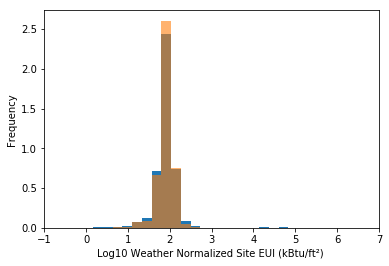

# 667 and extyra credit
plot a "scatter matrix" of the selected columns. Identify 4 promising "scaling laws" and plot them separately (a scatter plot of column1 vs column2). Does it make sense that there should be a scaling law between the 2 variables? 

which features should be strongly correlated or identical but are not? discuss

([this](https://stackoverflow.com/questions/26975089/making-the-labels-of-the-scatterplot-vertical-and-horizontal-in-pandas) stackoverflow may come in handy)

## all students
At last, from the original dataset remove only the columns that are NaN in the column "Weather Normalized Site EUI (kBtu/ft²)"


In [0]:
# -- drop buildings for which WN Site EUI is NaN
wnec = "Weather Normalized Site EUI (kBtu/ft²)"
...
ll84pl.shape

(4619, 156)

## Analysis: Owner investigation 
### Find owner of the single most energy consuming building

**Find owner of the single most energy consuming building**, as measured by the "Site Weather Normalized EUI per unit area ". 

**Find all the buildings that they own.**


show the weather-normalized site energy consumption and the owner name for the top 30 consuming buildings in Manhattan

In [0]:
print("Owner of the hisghest consuming building:...", 
      "They own ... buildings")

Owner of the hisghest consuming building:... They own ... buildings


### Find average building consumption by owner 
For all owners that own more than one building, find the average consumption for buildings owned by the same owner. Your dataframe should have 2 columns called _Weather Normalized Site EUI (kBtu/ft²)_	and _counts_

**Who owns the most energy consuming buildings on average?**

**Who owns the most buildings**

# 667 and EC

Universities are big realtors in NYC. The may own by different names. Find all builgings owned by NYU and COLUMBIA. replace the ownename with NYU and COLUMBIA respectively and re-aggregate the data based on these names and again find the owner of the buildings that pon average consume the most, of the highest number of buildings, and that owns the most sq footage 